# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Análise de Componentes Principais<br> Exercícios</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

<font color='red'> Recomendamos fortemente resolver os exercícios sem consultar as soluções antecipadamente </font>

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs.csv</font> disponível no _moodle_.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercício 1)
Calcule as direções principais do conjunto de dados armazenado na variável X definida no código abaixo. Imprima as 3 direções principais com maior variância.

In [69]:
# Instanciando X como um numpy array
X = pd.read_csv('blobs.csv').values
print(X.shape)

(500, 25)


In [70]:
from sklearn.decomposition import PCA
pca_obj=PCA(svd_solver='full')
X_transformed = pca_obj.fit(X)

# o atributo "components_" é um array onde as direções principais 
# estão armazenadas nas linhas, sendo a componente principal de maior 
# variância armazenada na linha 0, componente principal com a 
# segunda maior variância na linha 1 e assim por diante
print('\nTres direcoes com maior variancia\n')
print(X_transformed.components_[0:3])


Tres direcoes com maior variancia

[[ 1.92197646e-02 -2.06435693e-02  2.03149133e-02  2.85215074e-02
  -9.90931578e-03  6.80511220e-04  1.11433172e-02 -6.95451279e-03
  -9.92677418e-01  3.67757946e-02 -1.85597158e-02  1.95100212e-02
   1.83684280e-02 -4.39279974e-02  2.90013592e-02  1.70472900e-02
   5.19817429e-02 -1.05752911e-02  1.55291901e-02 -7.74234160e-03
   3.98920576e-03 -1.37186521e-02  5.08262800e-02 -8.95014464e-03
   2.89781030e-02]
 [ 1.79461688e-01  1.01948228e-01  1.16622674e-01  1.94845330e-01
   1.55385732e-01  1.62598385e-01  9.51584471e-03  3.46145642e-01
  -4.89428134e-02 -8.16320250e-02  3.00809995e-01  1.32208382e-01
   1.42191888e-01  3.14145675e-01 -1.88654700e-01 -9.56956086e-02
  -3.32721341e-01  3.93560366e-01 -1.26123633e-01  3.48592275e-01
   1.98752815e-01  4.19471732e-02 -4.46140845e-02 -5.39292086e-02
  -7.40742427e-02]
 [-2.39084918e-01 -7.29413297e-02 -3.58568151e-01  2.96299394e-02
  -1.51125110e-02  3.43591444e-02 -8.80850946e-02 -8.82816898e-02
  

### Exercício 2)
Faça um gráfico mostrando o decaimento no valor das variâncias. Faça um segundo gráfico mostrando o decaimento no valor da proporção de variância explicada por cada direção principal.

**Dica**: Utilize os atributos "explained_variance_" e "explained_variance_ratio_" no segundo caso. Veja [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para entender claramente a diferença entre tais atributos:

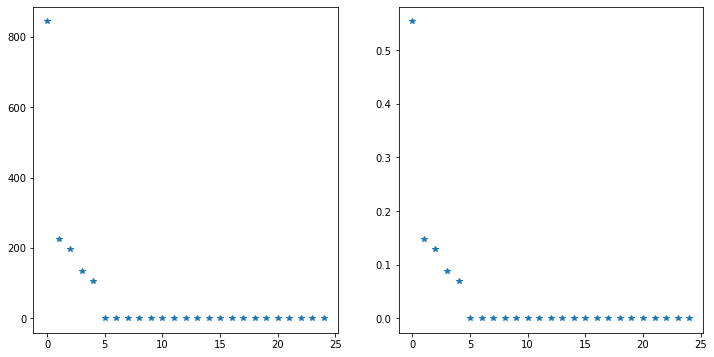

In [71]:
plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(pca_obj.explained_variance_, '*')       # plotando o decaimento das variâncias
ax2.plot(pca_obj.explained_variance_ratio_, '*') # plotando o decaimento das variâncias normalizadas (explicadas)

### Exercício 3)
Calcule quantas direções principais são necessárias para representar $80\%$ da variância contida nos dados.

In [72]:
# O atributo "explained_variance_ratio_" contém a porcentagem de
# informação representada em cada direção (ordenado da maior para a menor)
# Para encontrar o número de direções necessárias para representar
# 80% da informação basta somar os valores de "explained_variance_ratio_"
# até que se obtenha 80%

variance = pca_obj.explained_variance_ratio_
variance.shape

(25,)

In [73]:
variance = pca_obj.explained_variance_ratio_

soma = 0
num_componentes = 0
for i in range(variance.shape[0]):    # range(X_transformed.explained_variance_ratio_.shape[0])
    soma += variance[i]
    if soma >= 0.8:
        num_componentes = i+1
        break
        
print('Soma obtida:', soma, '\nNúmero de direções principais:', num_componentes)
    

Soma obtida: 0.830650103284895 
Número de direções principais: 3


### Exercício 4)
Utilizando apenas as duas componentes com maior variância, projete os dados originais nestas duas componentes e faça um "scatter plot" dos dados em duas dimensões.

(500, 2)


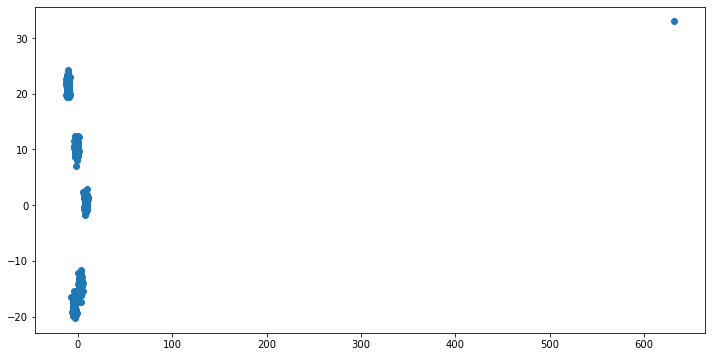

In [74]:
###########
# projecting data in 2D
###########

pca_proj=PCA(n_components=2)
X_2d=pca_proj.fit_transform(X)
print(X_2d.shape)

plt.scatter(X_2d[:,0],X_2d[:,1])

### Exercício 5)
Analisando o "scatter plot" do exercício anterior você deve ter notado que existem _outliers_ nos dados originais (pontos muito distantes dos demais). Encontre os _outliers_ e remova-os dos dados originais.

In [75]:
# utilizando z-score para encontrar outliers
# o pacote scipy possui um método para encontrar o z-score

from scipy.stats import zscore

# calculando z-scores
Xzscore = zscore(X,axis=0)

# encontrando outliers
outliers = np.abs(Xzscore) > 2.8 # 2.8 é o threshold utilizado para 
                                 # identificar um valor como outlier
    
outliers_id = np.argwhere(outliers == True)
print('indice das linhas dos elementos "outliers":\n',outliers_id)

# removendo outliers
df = pd.DataFrame(data=X)
print("Tamanho original dos dados:", df.shape)
df = df.drop(outliers_id[:,0],axis=0)
print("Tamanho dos dados após remoção dos outliers:", df.shape)

X_no_outliers = df.values

indice das linhas dos elementos "outliers":
 [[421   8]
 [426  15]]
Tamanho original dos dados: (500, 25)
Tamanho dos dados após remoção dos outliers: (498, 25)


In [76]:
# 421 e 426 representam os índices das linhas
# 8 e 15 representam os índices das colunas
outliers_id

array([[421,   8],
       [426,  15]], dtype=int64)

### Exercício 6)
Um dos problemas de PCA é sua sensibilidade à outliers, isto é, outliers interferem muito no cálculo das direções principais. Recalcule as direções principais dos dados cujos outliers foram removidos e verifique o quanto a direção principal de maior variância mudou.

**DICA**: utilize o ângulo entre as direções principais com e sem outliers para medir a mudança nas direções.

In [77]:
pca_obj2=PCA(svd_solver='full')
X_no_outliers_transformed = pca_obj2.fit(X_no_outliers)

# Calculando o ângulo entre as direções principais com e sem outliers:
# cos(angulo) = np.dot(v1,v2)/(np.norm(v1)*np.norm(v2))
# angulo = arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

v1 = X_transformed.components_[0] # direcao principal de maior variancia com outliers
v2 = X_no_outliers_transformed.components_[0] # direcao principal de maior variancia sem outliers

cos_comp = np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))               
ang = np.arccos(cos_comp)
print('ang=', ang)
print('angulo de',ang*180/3.1415,'graus entre direcoes principais')

ang= 1.848640687905145
angulo de 105.92243317616618 graus entre direcoes principais


### Exercício 7)
Compare visualmente o decaimento da proporção de variância explicada com e sem outliers (valores do atributo "explained_variance_ratio_"). 

Text(0.5, 1.0, 'Sem Outliers')

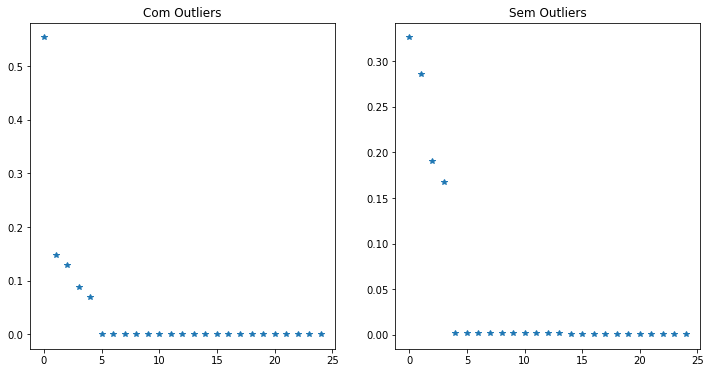

In [78]:
plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(pca_obj.explained_variance_ratio_, '*')  # plota o decaimento das variâncias norms (explicadas) com outliers
ax1.set_title('Com Outliers')
ax2.plot(pca_obj2.explained_variance_ratio_, '*') # plota o decaimento das variâncias norms (explicadas) sem outliers
ax2.set_title('Sem Outliers')

### Exercício 8)
Qual a proporção de variância explicada pelas 4 primeiras componentes principais após a remoção dos outliers?

In [79]:
pca_obj2.explained_variance_ratio_[0:4].sum()

0.9707288797875442

### Exercício 9)
Repita o exercício 4), utilizando os dados sem outliers, ou seja, projete os dados sem outliers nas duas primeiras direções principais e faça um scatter plot.

Os clusters contidos nos dados devem ser claramente visíveis após a remoção dos outliers.

(498, 2)


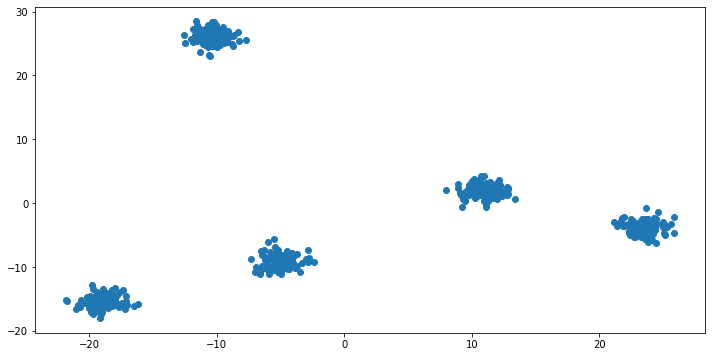

In [81]:
###########
# projecting data in 2D
###########

pca_proj2=PCA(n_components=2)
X_no_outliers_2d=pca_proj2.fit_transform(X_no_outliers)
print(X_no_outliers_2d.shape)

plt.scatter(X_no_outliers_2d[:,0],X_no_outliers_2d[:,1])